# Ejercicio 4
4- Realice una registración basada en características, otra con CCN y otra con MI de la imágenes
contenidas en “PAIByB-7”, evaluando los resultados con las métricas de la GUIA I ¿Qué
conclusiones puede sacar al respecto? Comparar los resultados entre sí.

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
import os

from registration import Imagen, Registracion

%load_ext autoreload
%autoreload 2

Antes de comenzar, se aclara que se utilizaran las versiones denoiseadas de las imágenes, ya que se obtienen mejores resultados en la registración.

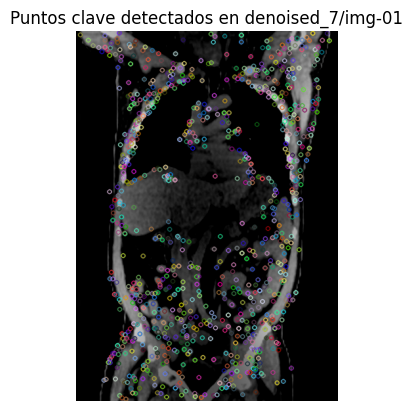

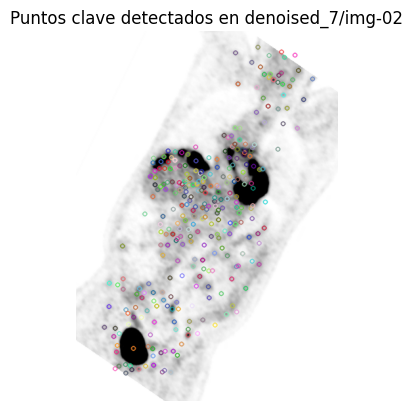

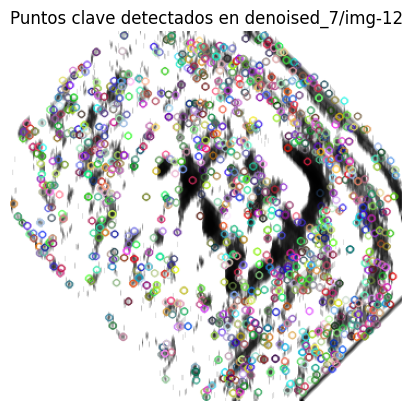

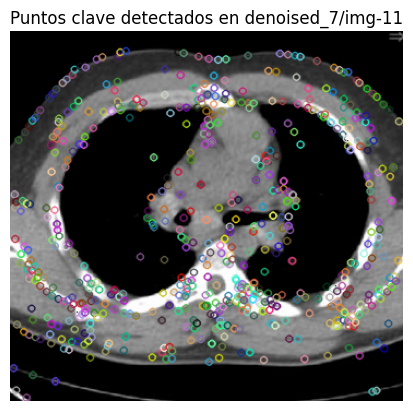

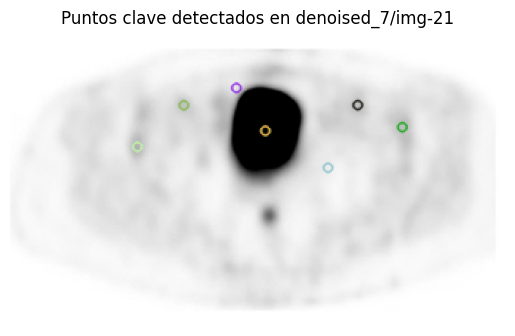

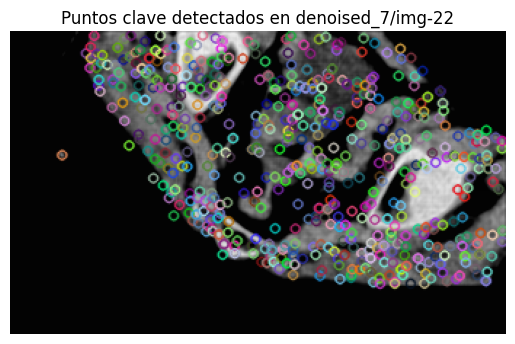

In [5]:
base_dir = 'denoised_7'
reg_pairs = {f"{base_dir}/img-{i}{i%2+1}.tif": f"{base_dir}/img-{i}{(i+1)%2+1}.tif" for i in range(3)}
img_pairs = []

for img1, img2 in reg_pairs.items():
    im1 = Imagen(img1, feature_extractor='sift')
    im1.mostrar_puntos_clave()
    im2 = Imagen(img2, feature_extractor='sift')
    im2.mostrar_puntos_clave()
    img_pairs.append((im1, im2))

# Registración basada en características por SIFT

Matches encontrados: 365


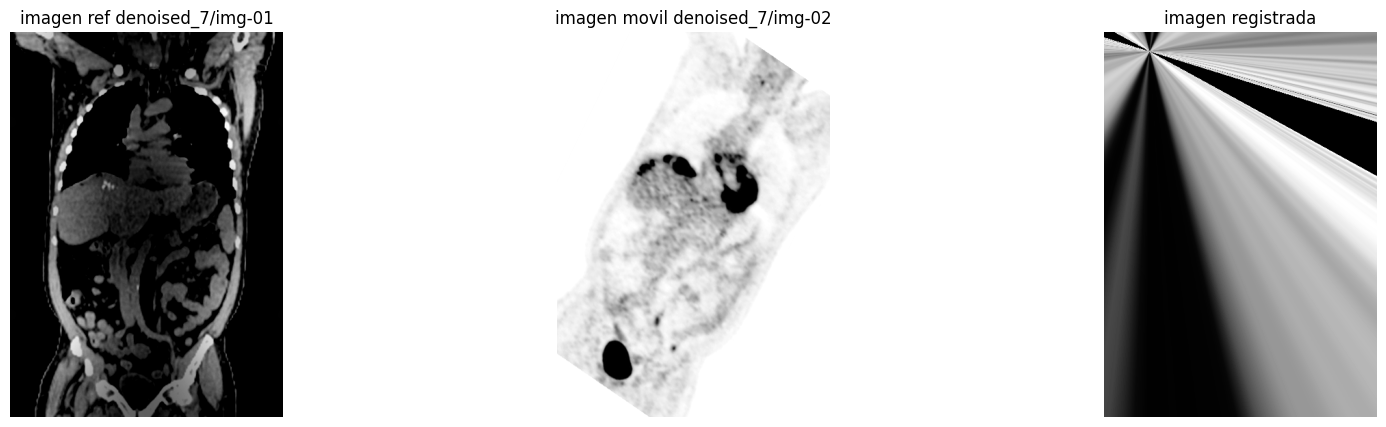

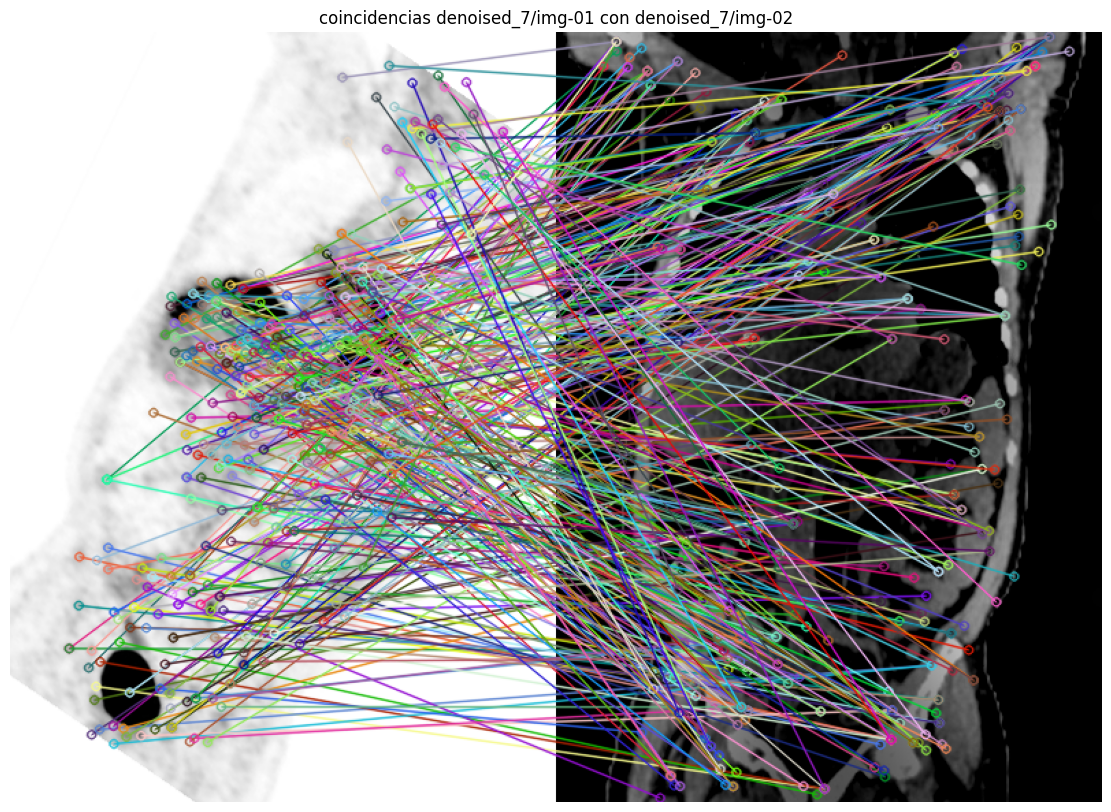

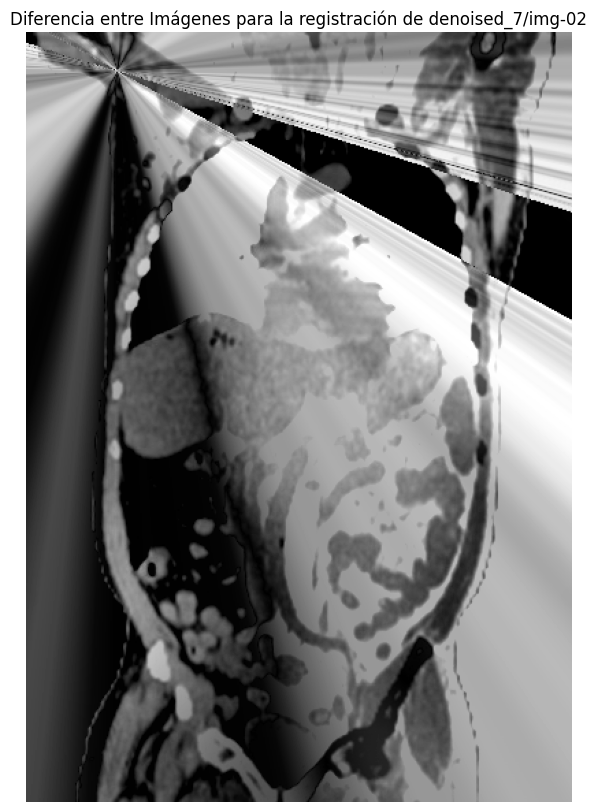

SSIM: 0.1097
MSE: 94.5417
PSNR: 65.3349
SSIM: 0.1097
MSE: 94.5417
PSNR: 65.3349
Matches encontrados: 615


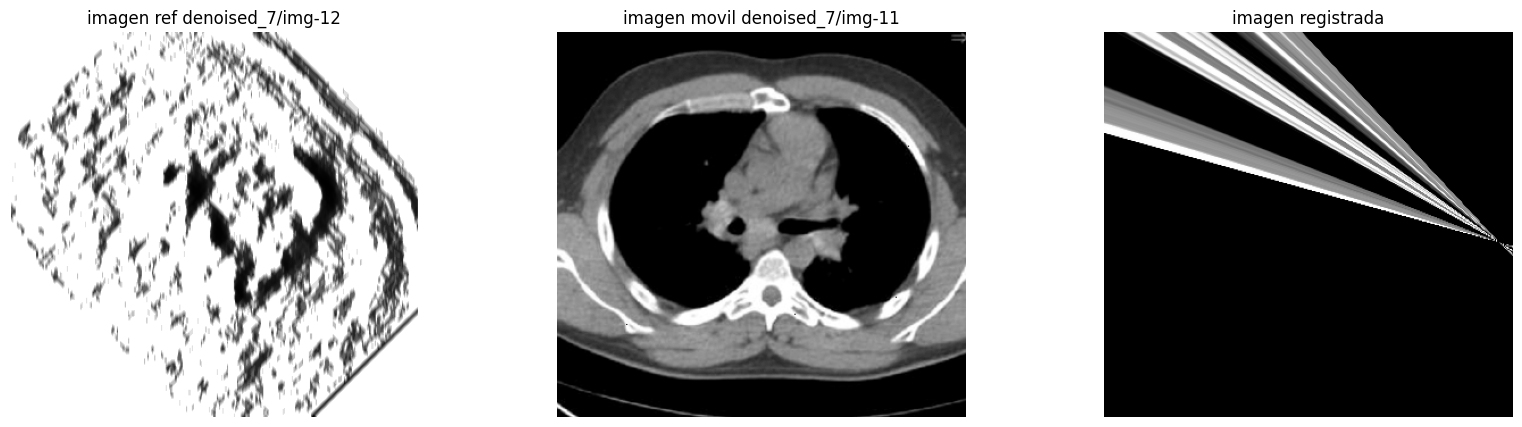

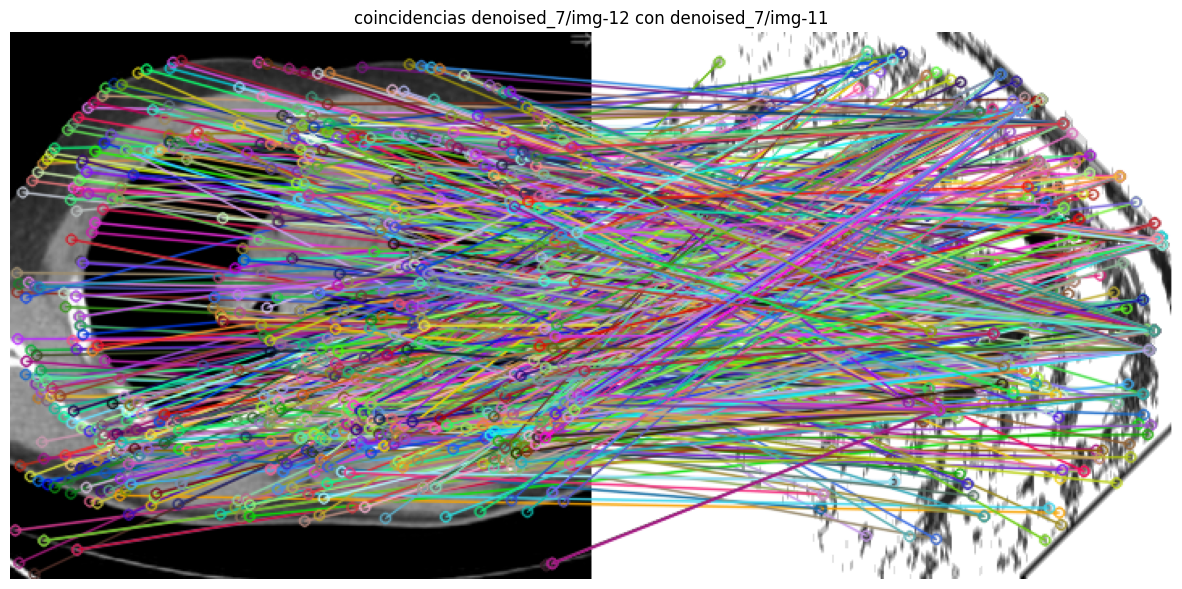

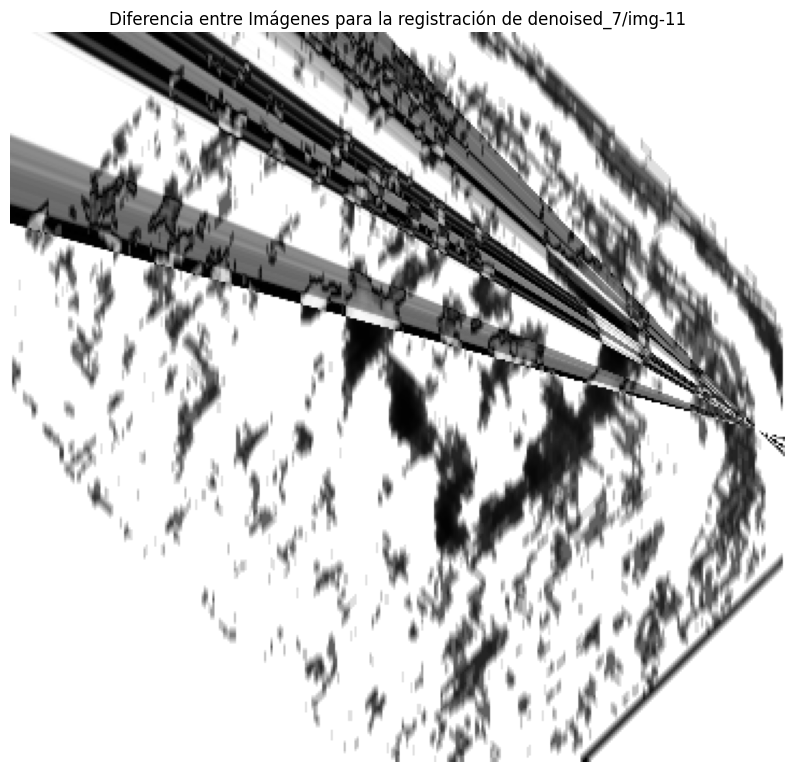

SSIM: 0.0080
MSE: 35.3906
PSNR: 75.1608
SSIM: 0.0080
MSE: 35.3906
PSNR: 75.1608
Matches encontrados: 584


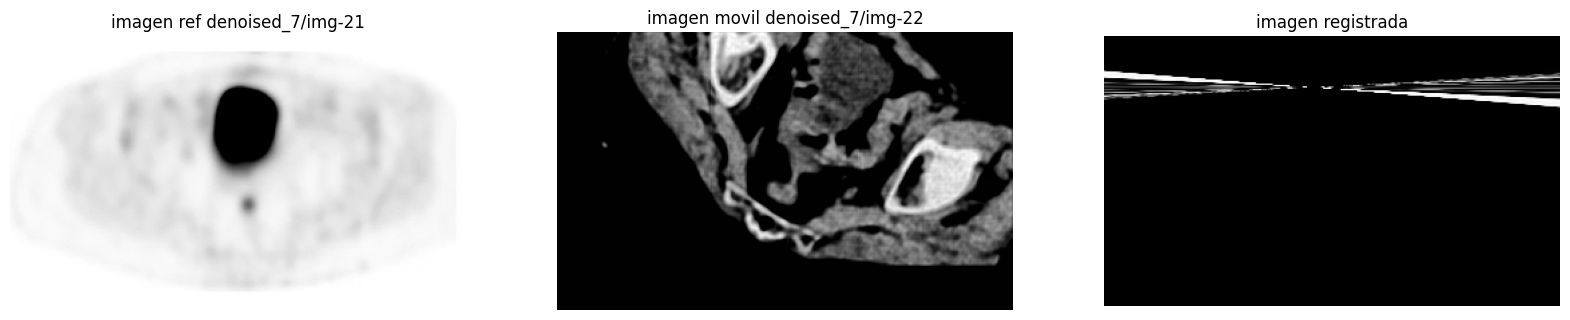

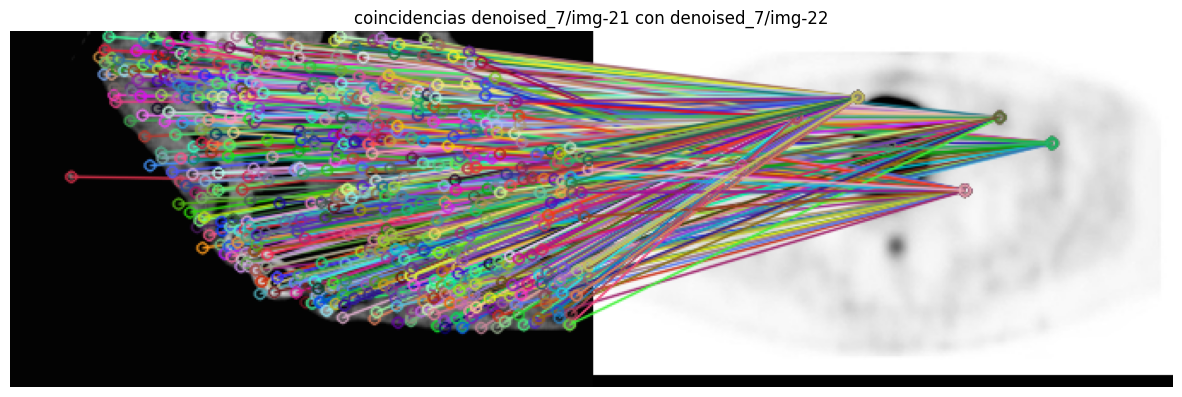

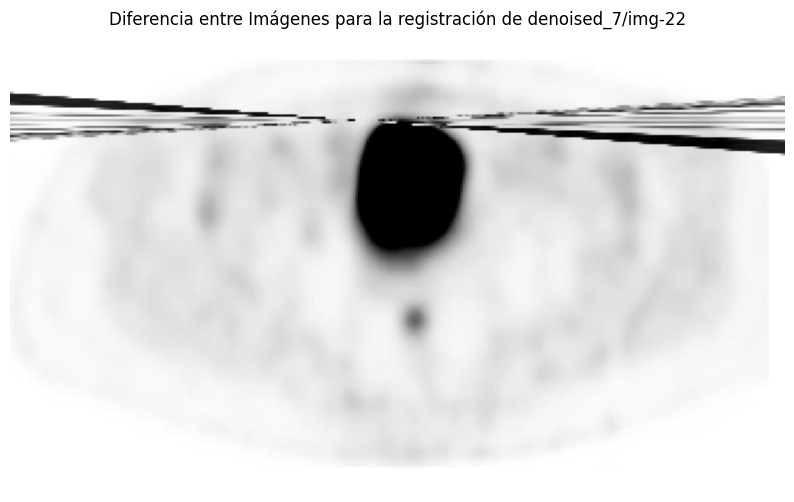

SSIM: 0.0251
MSE: 79.2750
PSNR: 67.0960
SSIM: 0.0251
MSE: 79.2750
PSNR: 67.0960


In [7]:
# Registración basada en características
for im1, im2 in img_pairs:
    reg = Registracion(im1, im2, modo='features', min_match_count=4, lowe_threshold=10, ransac_thres=5)
    reg.ejecutar_registracion(plot=True)
    reg.calcular_metricas()

## Registración basada en CCN


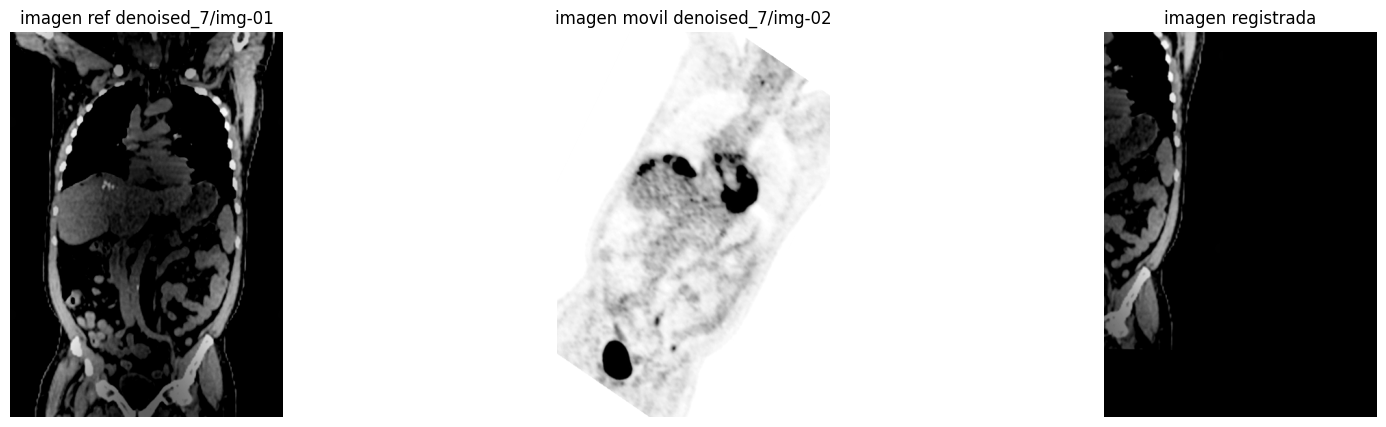

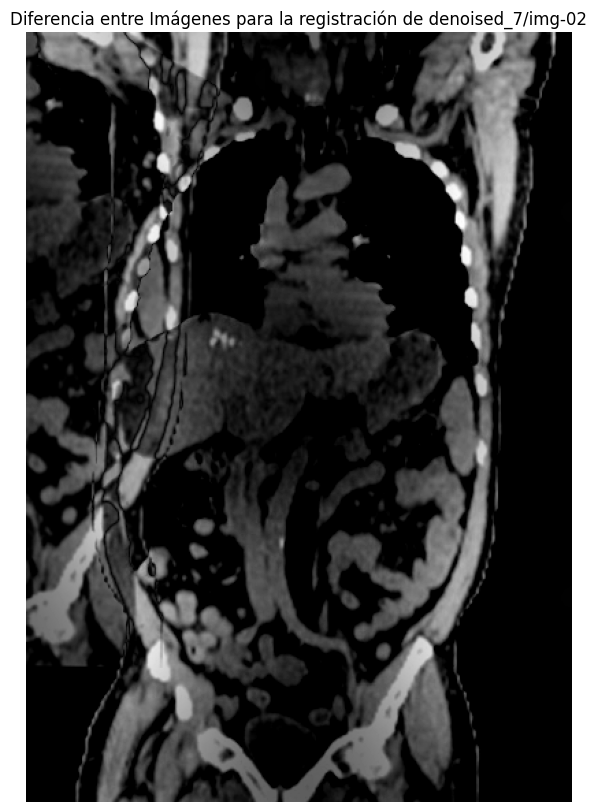

SSIM: 0.3373
MSE: 57.4632
PSNR: 70.3138


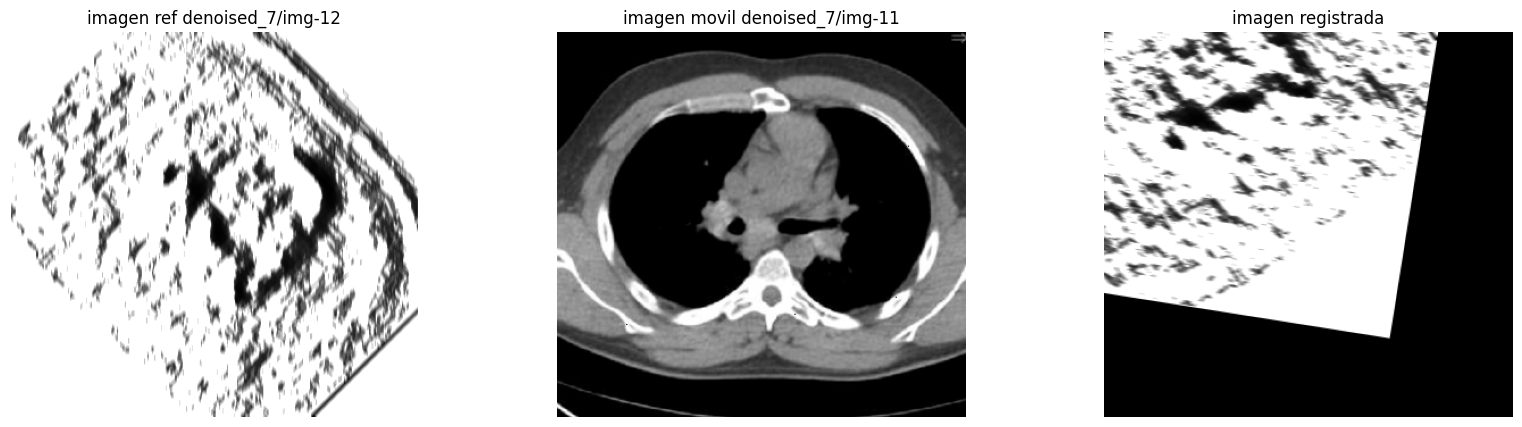

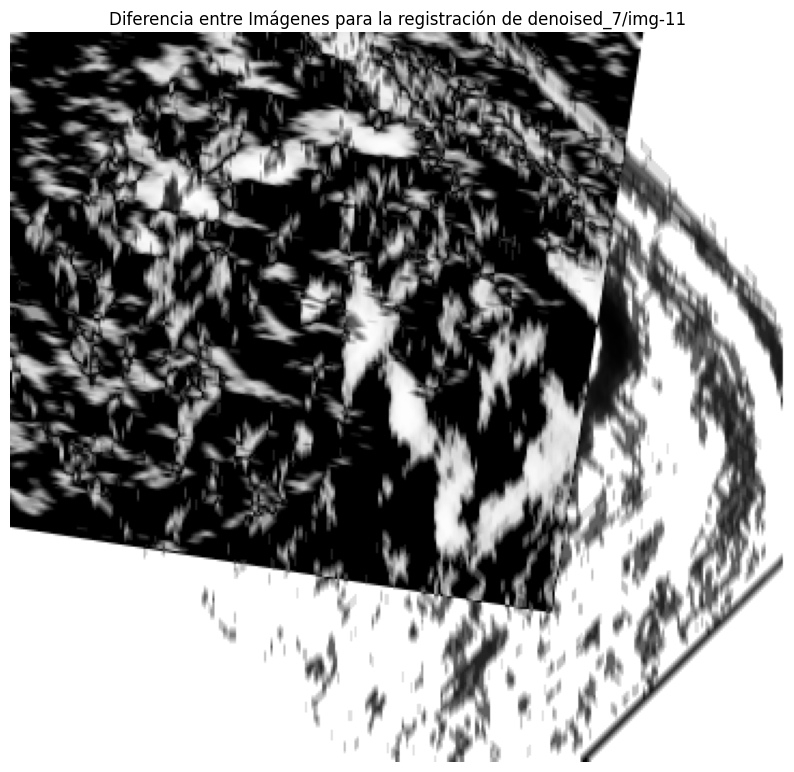

SSIM: 0.0780
MSE: 40.7016
PSNR: 73.7626


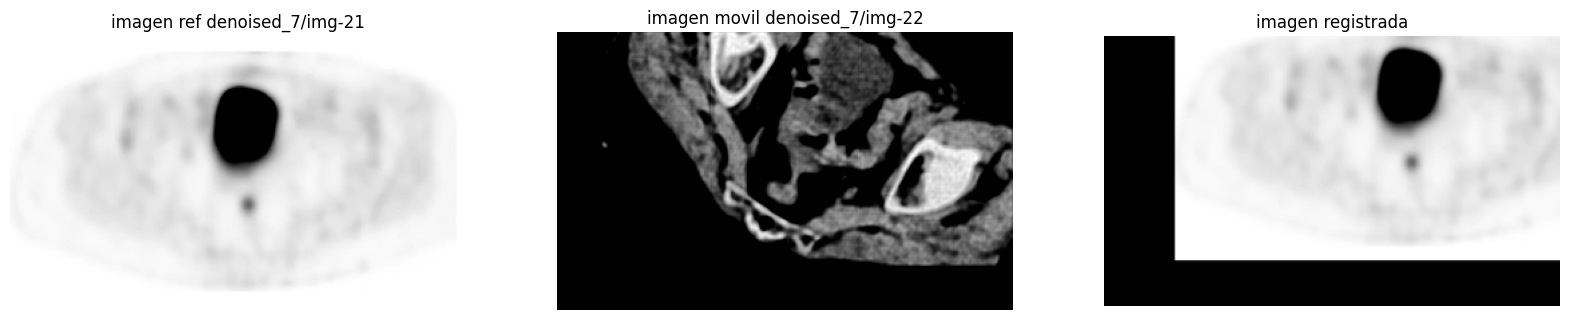

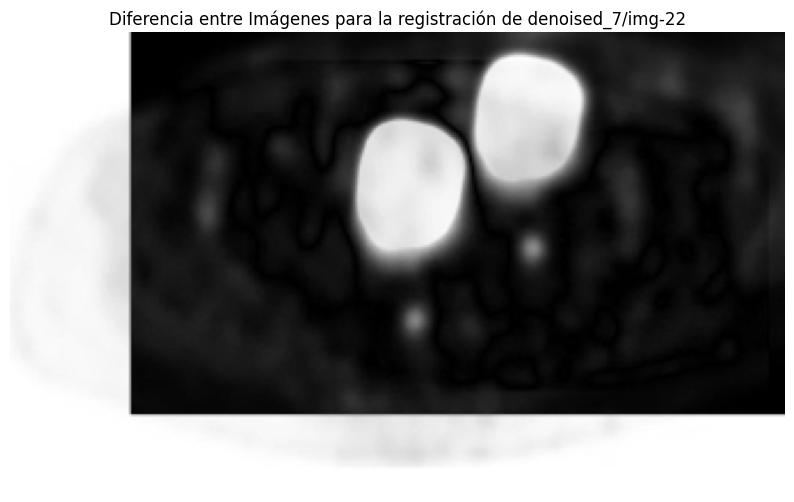

SSIM: 0.4362
MSE: 76.9219
PSNR: 67.3974


In [8]:
for im1, im2 in img_pairs:
    reg = Registracion(im1, im2, modo='intensidad', ransac_thres=5)
    reg.registracion_CCN()
    reg.plot_registracion()
    reg.calcular_metricas()

## Registración basada en MI

In [10]:
for im1, im2 in img_pairs:
    reg = Registracion(im1, im2, modo='intensidad', ransac_thres=5)
    reg.registracion_IM()
    reg.plot_registracion()
    reg.calcular_metricas()

Información Mutua inicial: 0.142078
differential_evolution step 1: f(x)= -0.18339137984015222
differential_evolution step 2: f(x)= -0.19228387852239973
differential_evolution step 3: f(x)= -0.19228387852239973
differential_evolution step 4: f(x)= -0.2011861181529287
differential_evolution step 5: f(x)= -0.2011861181529287
differential_evolution step 6: f(x)= -0.20603146604063238
differential_evolution step 7: f(x)= -0.20603146604063238
differential_evolution step 8: f(x)= -0.20603146604063238
differential_evolution step 9: f(x)= -0.20603146604063238
differential_evolution step 10: f(x)= -0.20971526001607077
differential_evolution step 11: f(x)= -0.2102583216494333
differential_evolution step 12: f(x)= -0.21588570674937624
differential_evolution step 13: f(x)= -0.21588570674937624
differential_evolution step 14: f(x)= -0.21588570674937624
differential_evolution step 15: f(x)= -0.2169583759628749
differential_evolution step 16: f(x)= -0.21708882378422814
differential_evolution step 17: f

KeyboardInterrupt: 